In [ ]:
from google.colab import files
uploaded=files.upload()

Saving me.bmp to me.bmp


50it [00:00, 4801.83it/s]

70540
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
50
50
[1, 2, 1, 1, 2, 2, 3, 3, 2, 3, 2, 1, 3, 1, 3, 3, 2, 2, 2, 1, 3, 2, 1, 3, 1, 3, 1, 3, 1, 2, 1, 2, 1, 3, 2, 2, 3, 1, 3, 1, 3, 3, 2, 2, 2, 3, 1, 3, 1, 2]


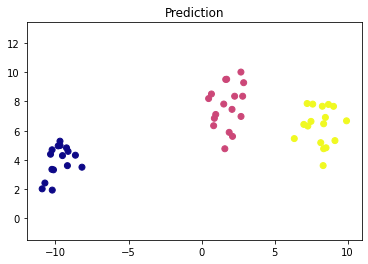

In [ ]:
from PIL import Image
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import datasets
import matplotlib.pyplot as plt
import math 
from tqdm import tqdm, trange
img = Image.open("me.bmp")
img = img.rotate(-90, expand=True)
clusterArray=[]
imgArray=np.array(img)#圖片轉nparray
#print(img.width)
#print(img.height)
#print(len(imgArray))
#print(imgArray[543,752])
for i in range(0,img.height):
  for j in range(0,img.width): 
    if imgArray[i][j]==False:
      clusterArray.append([i,j])#將有黑點的座標位置append到分群用array
#print(clusterArray)
clusterArray = np.array(clusterArray)#append完後轉nparray
labels = [-1]*len(clusterArray)
print(len(clusterArray))



def Euclidean_Dist(p1,p2): #歐式距離計算
  return math.sqrt((p1[0]-p2[0])**2+(p1[1]-p2[1])**2)
def Scan(data,pid,cid,eps,MinPts,VisitList,NeighborStack):#以此中心進行掃描
  
  NeighborC=[]
  for j in range(0,len(data)):
    if Euclidean_Dist(data[pid],data[j])<eps and pid!=j:
      NeighborC.append(j) #記錄掃描到的點
      
  if len(NeighborC)>MinPts: #掃到的點數量超過MinPts
    for i in NeighborC:labels[i]=cid  #掃描到的點予以上色分群
    
    for i in NeighborC:#逐一檢查掃描到的點是不是新點，如果是的話append到stack裡等等以stack pop掃描
      if i not in VisitList and i not in NeighborStack:
        NeighborStack.append(i)

    # labels[pid]=cid #自我上色分群

    #看看Stack空了沒，空了代表群分完了，return給主函式知道，cid+1
    if not NeighborStack:
      return True
    
  else: #掃到的點數量沒有超過MinPts
    labels[pid]=False #雜訊
    #看看Stack空了沒，空了代表群分完了，return給主函式知道，cid+1

    
def DBSCAN_TuPao(data,eps,MinPts):
  progress = tqdm(len(data))
  cid=1
  VisitList=[]#遍歷名單
  NeighborStack=[]#單群內關聯Stack
  labels=[False]*len(data)#建立每一點的歸類群列表
  pid=0
  while len(VisitList)!=len(data):#迴圈直到遍歷所有資料點
       
    
    if NeighborStack:#如果stack有東西，pop出來掃描，反之使用i掃描
      StackPid=NeighborStack.pop()#Stack pop

      if Scan(data,StackPid,cid,eps,MinPts,VisitList,NeighborStack):#pop出來的東西掃描，同時檢查Stack
        cid=cid+1
      VisitList.append(StackPid)#pop出來的pid加入已遍歷名單
      progress.update(1)
    else:
      if pid in VisitList:#如果中心點先被stack拿去掃了，跳出本次迴圈，否則正常使用pid掃描
        pid=pid+1
        continue
      else:
        if Scan(data,pid,cid,eps,MinPts,VisitList,NeighborStack):#pid掃描後+1
          cid=cid+1
        VisitList.append(pid)
        pid=pid+1
        progress.update(1)
        
  VisitList.sort()     
  print(VisitList)
  print(len(VisitList))
  print(len(data))



X,y = datasets.make_blobs(n_samples=50, centers=3, n_features=2, random_state= 20, cluster_std = 1.0)


# DBSCAN_TuPao(clusterArray,2,5)
labels = [False]*len(X)
DBSCAN_TuPao(X,3,3)

print(labels)
# print(X)
# print(labels)
plt.figure()
plt.scatter(X[:,0], X[:,1],c=labels,cmap='plasma')
plt.axis('equal')
plt.title('Prediction')
plt.show()
